### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
# Step 1: Data Collection
# Fetch historical stock price data for AMZN from Yahoo Finance
stock_data = yf.download('AMZN', start='2015-01-01', end='2022-01-01')

# Step 2: Data Preprocessing

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Step 2: Data Preprocessing
# Remove missing values
stock_data.dropna(inplace=True)

In [4]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.629000,15.737500,15.348000,15.426000,15.426000,55664000
2015-01-05,15.350500,15.419000,15.042500,15.109500,15.109500,55484000
2015-01-06,15.112000,15.150000,14.619000,14.764500,14.764500,70380000
2015-01-07,14.875000,15.064000,14.766500,14.921000,14.921000,52806000
2015-01-08,15.016000,15.157000,14.805500,15.023000,15.023000,61768000
...,...,...,...,...,...,...
2021-12-27,171.037003,172.942993,169.215500,169.669495,169.669495,58688000
2021-12-28,170.182495,172.175995,169.135498,170.660995,170.660995,54638000
2021-12-29,170.839996,171.212006,168.600494,169.201004,169.201004,35754000


In [5]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))


In [6]:
# Create sequences of historical data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 100
X, y = create_sequences(scaled_data, sequence_length)


In [7]:
# Split the data into training and testing sets
train_size = int(len(X) * 0.8)                       # 80% of our data we are sending it for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
# Step 3: Model Building
# Build the stacked LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:

# Step 4: Model Training
# Train the model and monitor loss in each epoch
history = model.fit(X_train, y_train, epochs=40, batch_size=50, validation_data=(X_test, y_test))

Epoch 1/40
27/27 [==============================] - 11s 209ms/step - loss: 0.0173 - val_loss: 0.0042
Epoch 2/40
27/27 [==============================] - 5s 188ms/step - loss: 9.1632e-04 - val_loss: 0.0015
Epoch 3/40
27/27 [==============================] - 4s 155ms/step - loss: 5.6932e-04 - val_loss: 0.0026
Epoch 4/40
27/27 [==============================] - 5s 183ms/step - loss: 5.3374e-04 - val_loss: 0.0037
Epoch 5/40
27/27 [==============================] - 4s 164ms/step - loss: 5.2026e-04 - val_loss: 0.0048
Epoch 6/40
27/27 [==============================] - 4s 155ms/step - loss: 5.6144e-04 - val_loss: 0.0035
Epoch 7/40
27/27 [==============================] - 5s 196ms/step - loss: 4.9239e-04 - val_loss: 0.0037
Epoch 8/40
27/27 [==============================] - 4s 154ms/step - loss: 4.8450e-04 - val_loss: 0.0016
Epoch 9/40
27/27 [==============================] - 4s 154ms/step - loss: 4.5496e-04 - val_loss: 0.0029
Epoch 10/40
27/27 [==============================] - 5s 192ms/step 

In [11]:
# Step 5: Model Evaluation
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

11/11 [==============================] - 0s 38ms/step - loss: 9.3975e-04
Test Loss: 0.0009397459798492491


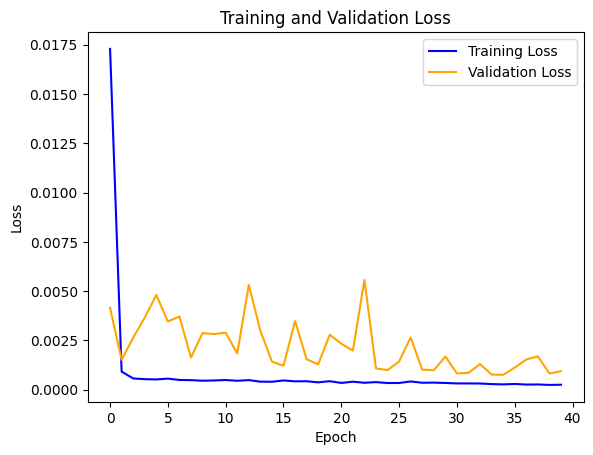

In [12]:
# Step 6: Visualization (Loss Over Epochs)
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [13]:
# Step 7: Prediction and Forecasting
# Make predictions for the next 30 days
future_days = 30
future_predictions = []
last_sequence = X[-1]
for _ in range(future_days):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    future_predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction[0, 0])

1/1 [==============================] - 0s 33ms/step


In [14]:

# Inverse transform the scaled data
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

<ipython-input-16-c6f71c62cda3>:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  plt.plot(pd.date_range(start=stock_data.index[-1], periods=future_days+1, closed='right')[1:], future_predictions, label='Forecasted', color='orange')


ValueError: x and y must have same first dimension, but have shapes (29,) and (30, 1)

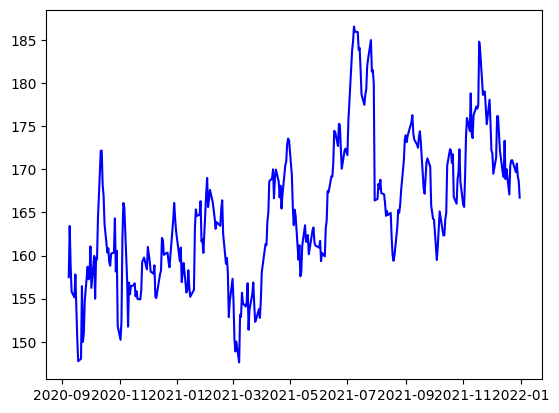

In [16]:
# Plot the predicted values for the next 30 days
plt.plot(stock_data.index[-len(y_test):], scaler.inverse_transform(y_test), label='Actual', color='blue')
plt.plot(pd.date_range(start=stock_data.index[-1], periods=future_days+1, closed='right')[1:], future_predictions, label='Forecasted', color='orange')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('AMZN Stock Price Forecasting for the Next 30 Days')
plt.legend()
plt.show()